In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:\\Users\\CVR\\Desktop\\6655\\dataset\\inventory_data_noisy.csv')
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18360 entries, 0 to 18359
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dealer_ID    18360 non-null  object 
 1   Product_ID   18360 non-null  object 
 2   Date         18360 non-null  object 
 3   Quantity     18268 non-null  float64
 4   Consumption  18268 non-null  float64
 5   Location     18176 non-null  object 
dtypes: float64(2), object(4)
memory usage: 860.8+ KB


In [5]:
df.isnull().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity        92
Consumption     92
Location       184
dtype: int64

In [6]:
df.dtypes

Dealer_ID       object
Product_ID      object
Date            object
Quantity       float64
Consumption    float64
Location        object
dtype: object

In [7]:
df['Quantity']=df['Quantity'].fillna(df['Quantity'].mean())
df['Consumption']=df['Consumption'].fillna(df['Consumption'].median())
df['Location']=df['Location'].fillna(df['Location'].mode()[0])

In [8]:
df.isnull().sum()

Dealer_ID      0
Product_ID     0
Date           0
Quantity       0
Consumption    0
Location       0
dtype: int64

In [9]:
df.describe()

,Quantity,Consumption
count,18360.000000,18360.000000
mean,59.105704,12.933824
std,70.907332,13.280293
min,10.000000,5.000000
25%,32.000000,8.000000
50%,55.000000,12.000000
75%,77.000000,16.000000
max,990.000000,190.000000


In [10]:
df.drop_duplicates()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.000000,8.0,Chicago
1,D000,P000,2022-01-02,70.000000,9.0,Chicago
2,D000,P000,2022-01-03,12.000000,17.0,Los Angeles
3,D000,P000,2022-01-04,74.000000,13.0,Los Angeles
4,D000,P000,2022-01-05,57.000000,10.0,Los Angeles
...,...,...,...,...,...,...
18253,D008,P013,2022-02-29,59.105704,12.0,New York
18264,D001,P010,2022-01-27,26.000000,18.0,Chicago
18328,D001,P014,2022-01-14,30.000000,5.0,Chicago
18337,D001,P013,2022-01-26,48.000000,15.0,Chicago


In [11]:
df.dtypes

Dealer_ID       object
Product_ID      object
Date            object
Quantity       float64
Consumption    float64
Location        object
dtype: object

In [12]:
df['Date']=pd.to_datetime(df['Date'],format='%y-%m-%d',errors='coerce')

In [13]:
df.dtypes

Dealer_ID              object
Product_ID             object
Date           datetime64[ns]
Quantity              float64
Consumption           float64
Location               object
dtype: object

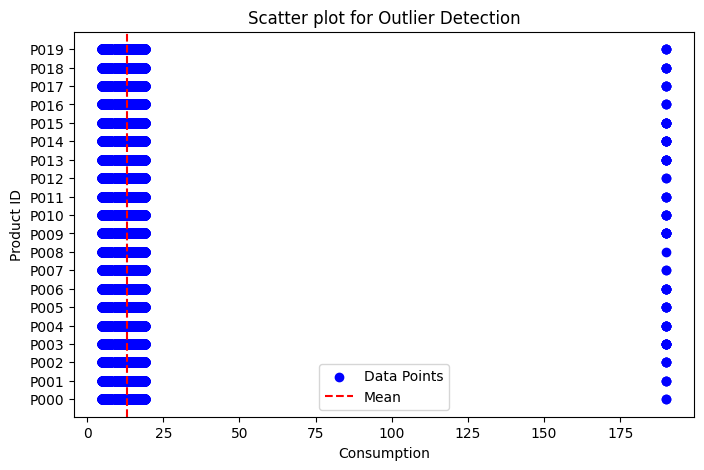

In [14]:
plt.figure(figsize=(8,5))

plt.scatter(df['Consumption'], df['Product_ID'], color='blue', label='Data Points')
plt.axvline(x=df['Consumption'].mean(), color='red', linestyle='--', label='Mean')
plt.xlabel("Consumption")
plt.ylabel("Product ID")
plt.title("Scatter plot for Outlier Detection")
plt.legend()
plt.show()

In [15]:
from scipy.stats import zscore

z_score=np.abs(zscore(df.select_dtypes(include=["number"])))
cleaned=df[(z_score<3).all(axis=1)]
print("Dataset Shape after removing outliers:",cleaned.shape)

Dataset Shape after removing outliers: (18268, 6)


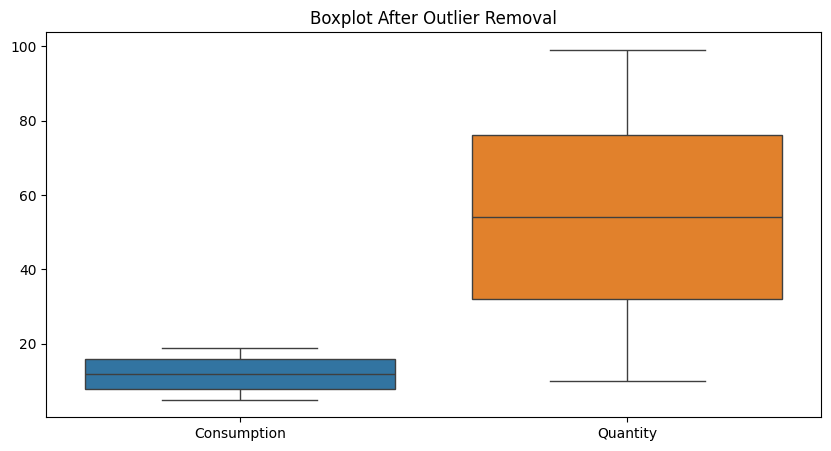

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=cleaned[['Consumption','Quantity','Product_ID']])
plt.title("Boxplot After Outlier Removal")
plt.show()

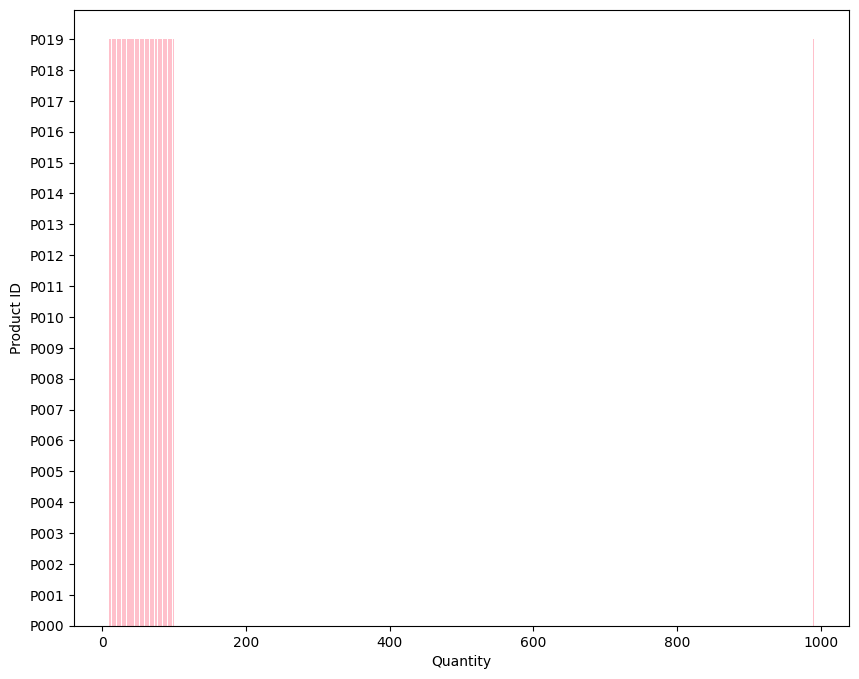

In [17]:
plt.figure(figsize=(10,8))
x=df['Quantity']
y=df['Product_ID']
plt.bar(x,y,color='pink')
plt.xlabel('Quantity')
plt.ylabel('Product ID')
plt.show()

In [19]:
#df['Consumption_level']
#df['Quantity_consumption_ratio']

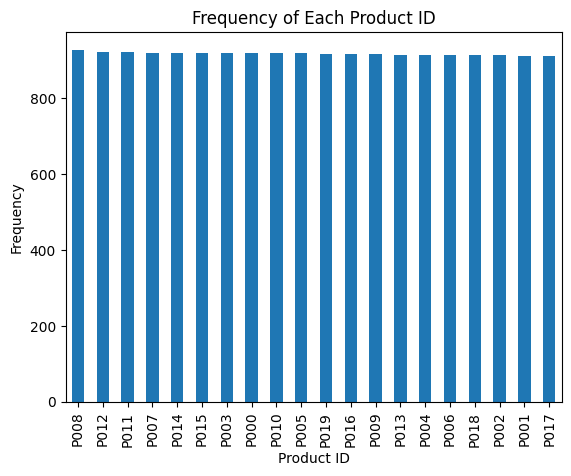

In [ ]:
df['Product_ID'].value_counts().plot(kind='bar')
plt.title('Frequency of Each Product ID')
plt.xlabel('Product ID')
plt.ylabel('Frequency')
plt.show()


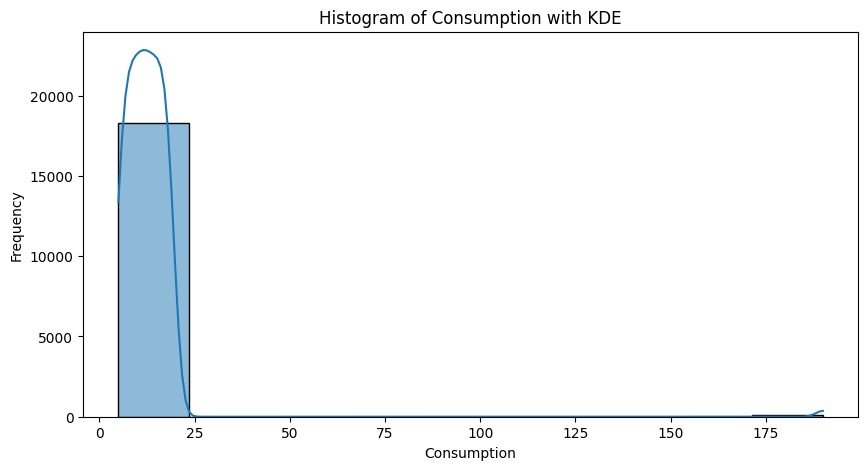

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Consumption'], bins=10, kde=True)
plt.title('Histogram of Consumption with KDE')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.show()

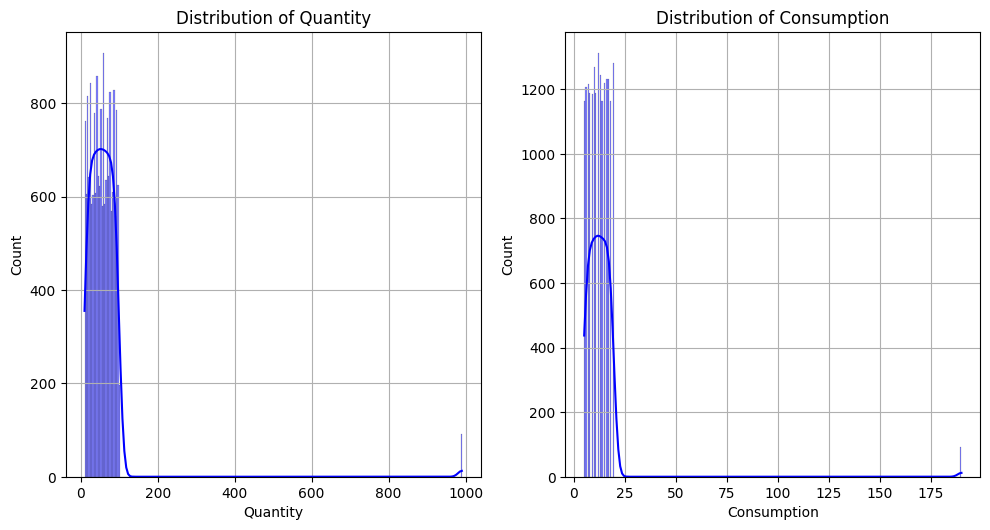

In [22]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['Quantity'], kde=True, color='blue')
plt.title('Distribution of Quantity')
plt.grid(True)

plt.subplot(2, 3, 2)
sns.histplot(df['Consumption'], kde=True, color='blue')
plt.title('Distribution of Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Boxplot of Consumption')

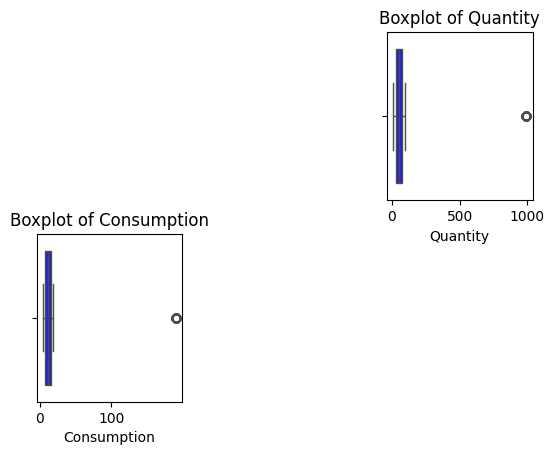

In [23]:
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Quantity', color='blue')
plt.title('Boxplot of Quantity')

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Consumption', color='blue')
plt.title('Boxplot of Consumption')

In [24]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

columns_to_filter = ["Quantity", "Consumption"]
df= remove_outliers_iqr(df, columns_to_filter)

Text(0.5, 1.0, 'Distribution of Consumption')

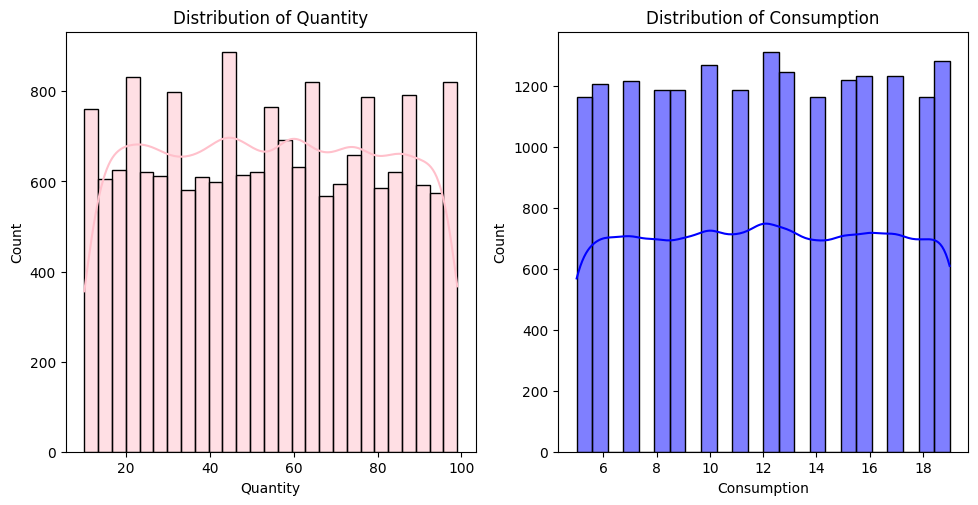

In [26]:
df_eda = df

plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
sns.histplot(df_eda['Quantity'], kde=True, color='pink')
plt.title('Distribution of Quantity')

plt.subplot(2, 3, 2)
sns.histplot(df_eda['Consumption'], kde=True, color='blue')
plt.title('Distribution of Consumption')

Text(0.5, 1.0, 'Boxplot of Consumption')

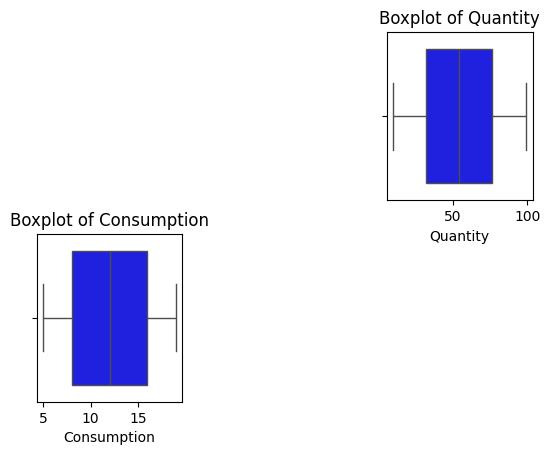

In [27]:
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Quantity', color='blue')
plt.title('Boxplot of Quantity')

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Consumption', color='blue')
plt.title('Boxplot of Consumption')

In [28]:
print("Categories in 'Dealer_ID' variable:     ",end=" " )
print(df['Dealer_ID'].unique())

print("Categories in 'Product_ID' variable:  ",end=" ")
print(df['Product_ID'].unique())

print("Categories in'Location' variable:",end=" " )
print(df['Location'].unique())

Categories in 'Dealer_ID' variable:      ['D000' 'D001' 'D002' 'D003' 'D004' 'D005' 'D006' 'D007' 'D008' 'D009']
Categories in 'Product_ID' variable:   ['P000' 'P001' 'P002' 'P003' 'P004' 'P005' 'P006' 'P007' 'P008' 'P009'
 'P010' 'P011' 'P012' 'P013' 'P014' 'P015' 'P016' 'P017' 'P018' 'P019']
Categories in'Location' variable: ['Chicago' 'Los Angeles' 'New York']


In [29]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['Date', 'Quantity', 'Consumption']

We have 3 categorical features : ['Dealer_ID', 'Product_ID', 'Location']


In [30]:
low_threshold = df["Consumption"].quantile(0.33)
high_threshold = df["Consumption"].quantile(0.66)

In [31]:
def categorize_consumption(value):
    if value <= low_threshold:
        return "Low"
    elif value <= high_threshold:
        return "Medium"
    else:
        return "High"

df["Consumption_Level"] = df["Consumption"].apply(categorize_consumption)

df['Quantity_consumption_ratios'] = df['Quantity']/df['Consumption']

In [32]:
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,Consumption_Level,Quantity_consumption_ratios
0,D000,P000,NaT,62.0,8.0,Chicago,Low,7.750000
1,D000,P000,NaT,70.0,9.0,Chicago,Low,7.777778
2,D000,P000,NaT,12.0,17.0,Los Angeles,High,0.705882
3,D000,P000,NaT,74.0,13.0,Los Angeles,Medium,5.692308
4,D000,P000,NaT,57.0,10.0,Los Angeles,Low,5.700000


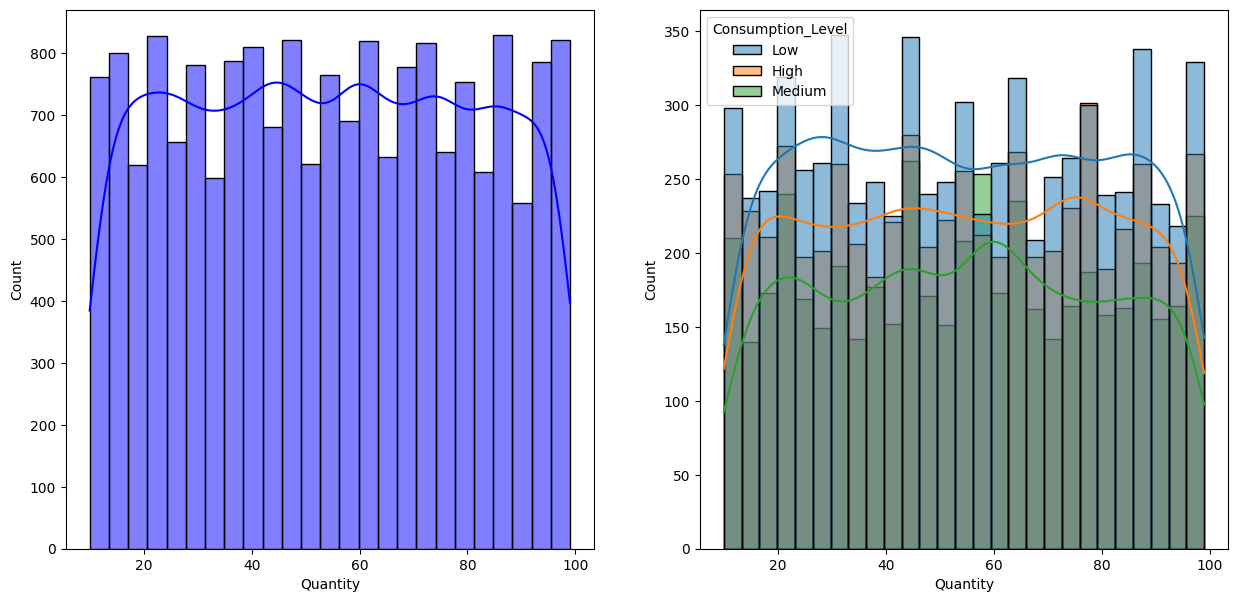

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Quantity',bins=25,kde=True,color='blue')
plt.subplot(122)
sns.histplot(data=df,x='Quantity',kde=True,hue='Consumption_Level')
plt.show()

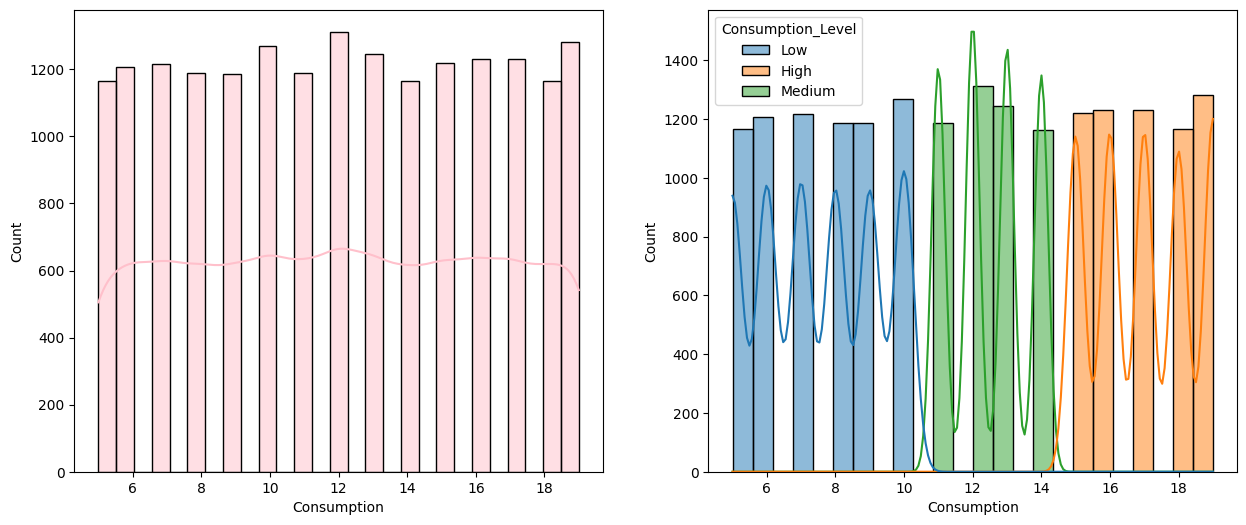

In [45]:
fig, axs = plt.subplots(1, 2,figsize=(15, 6))
plt.subplot(121)
sns.histplot(data=df,x='Consumption',bins=27,kde=True,color='pink')
plt.subplot(122)
sns.histplot(data=df,x='Consumption',kde=True,hue='Consumption_Level')
plt.show()

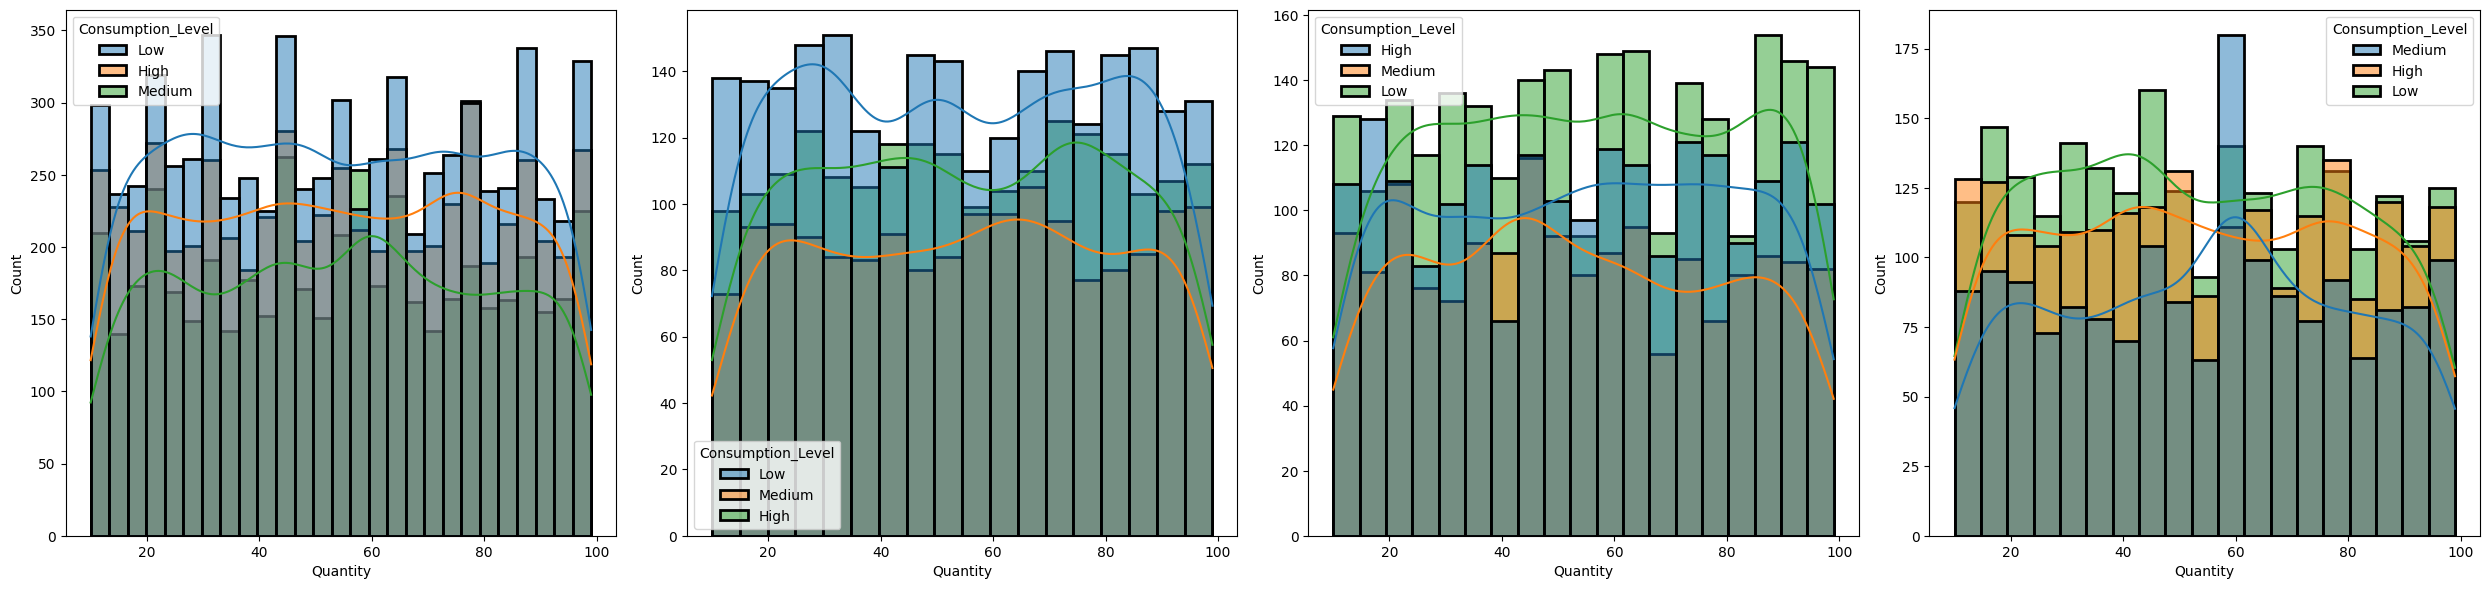

In [48]:
plt.subplots(1, 4, figsize=(25, 6))

plt.subplot(141)
sns.histplot(data=df, x='Quantity', kde=True, hue='Consumption_Level', linewidth=2)

plt.subplot(142)
sns.histplot(data=df[df.Location == 'Chicago'], x='Quantity', kde=True, hue='Consumption_Level', linewidth=2)

plt.subplot(143)
sns.histplot(data=df[df.Location == 'Los Angeles'], x='Quantity', kde=True, hue='Consumption_Level', linewidth=2)

plt.subplot(144)
sns.histplot(data=df[df.Location == 'New York'], x='Quantity', kde=True, hue='Consumption_Level', linewidth=2)

plt.tight_layout()
plt.show()


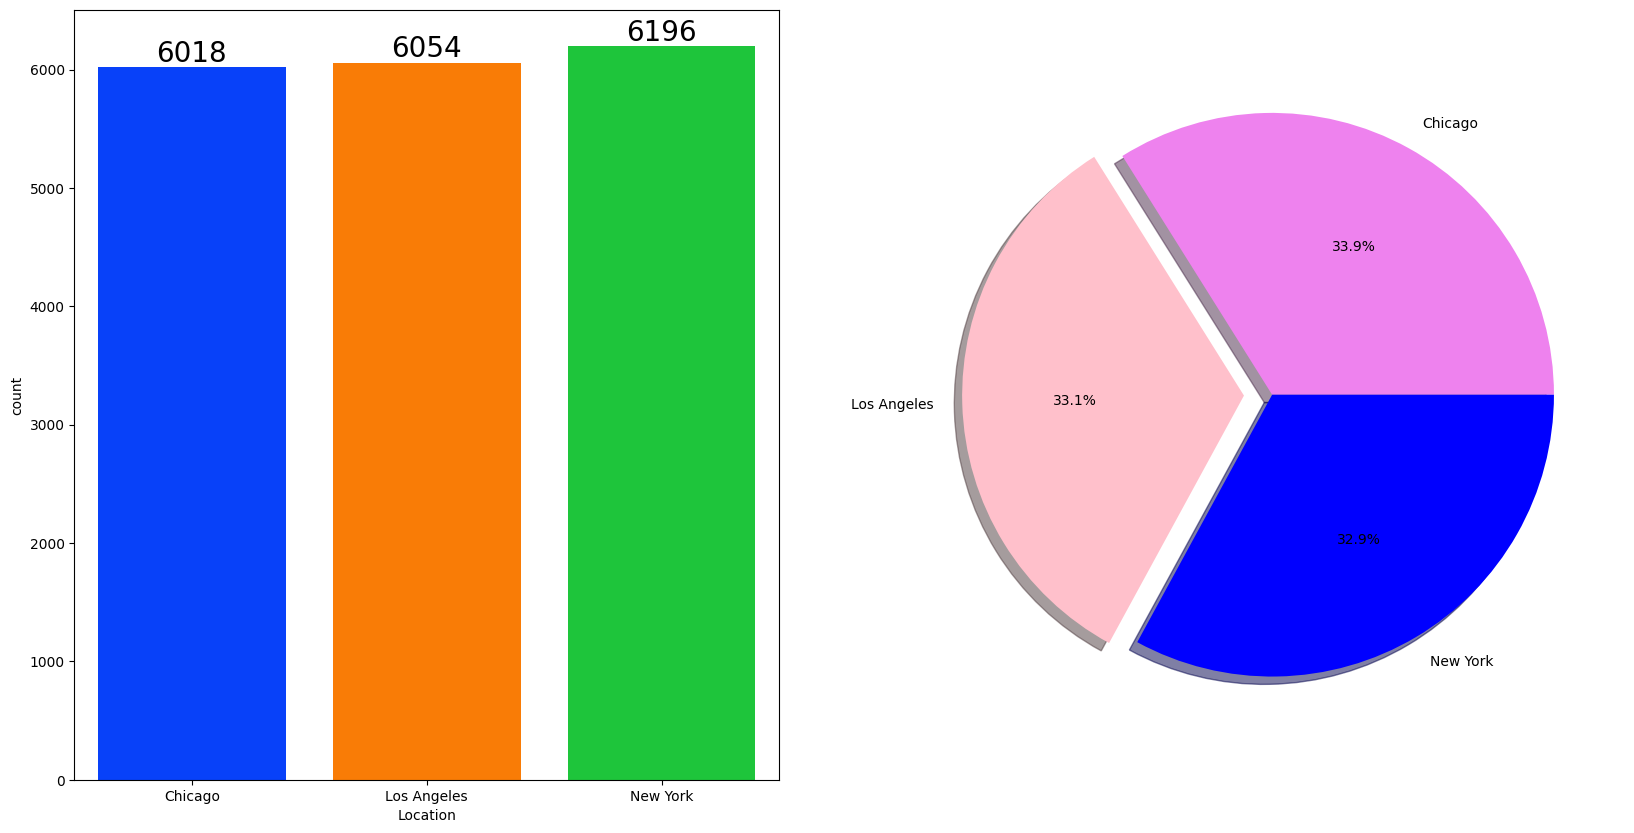

In [49]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Location'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Location'].value_counts(),labels=['Chicago','Los Angeles','New York'],explode=[0,0.1,0],autopct='%1.1f%%',shadow=True,colors=['violet','pink','blue'])
plt.show()

In [50]:
location_group = df.groupby('Location')
location_group

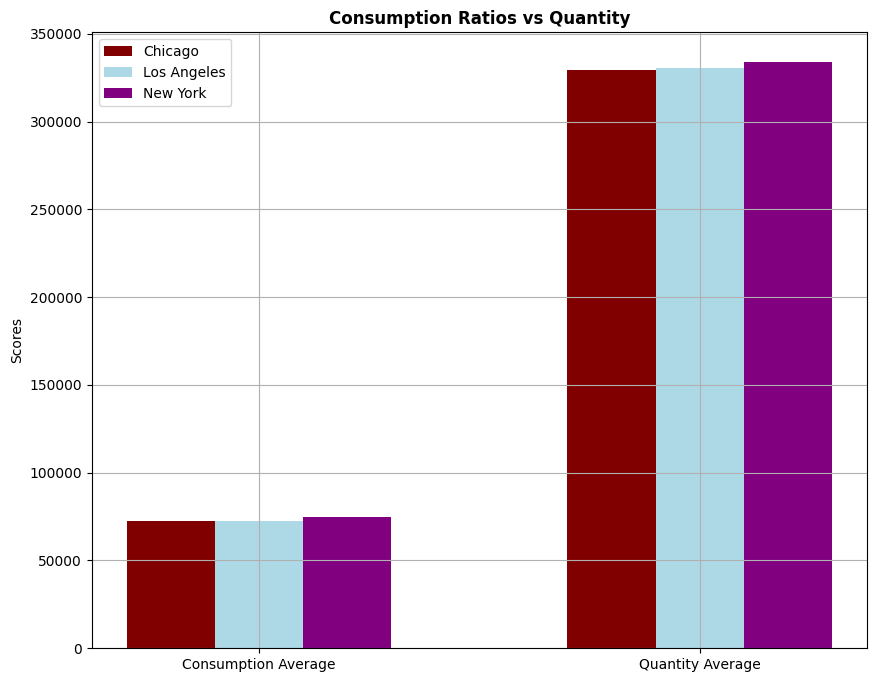

In [59]:
location_group = df.groupby('Location')[['Consumption', 'Quantity']].sum()

chicago_scores = [
    location_group.loc['Chicago', 'Consumption'], 
    location_group.loc['Chicago', 'Quantity']
]
losangeles_scores = [
    location_group.loc['Los Angeles', 'Consumption'], 
    location_group.loc['Los Angeles', 'Quantity']
]
newyork_scores = [
    location_group.loc['New York', 'Consumption'], 
    location_group.loc['New York', 'Quantity']
]

plt.figure(figsize=(10, 8))

X = ['Consumption Average', 'Quantity Average']
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, chicago_scores, 0.2, label='Chicago',color='maroon')
plt.bar(X_axis, losangeles_scores, 0.2, label='Los Angeles',color='lightblue')
plt.bar(X_axis + 0.2, newyork_scores, 0.2, label='New York',color='purple')
plt.xticks(X_axis, X)
plt.ylabel("Scores")
plt.title("Consumption Ratios vs Quantity", fontweight='bold')
plt.grid(True)
plt.legend()
plt.show()


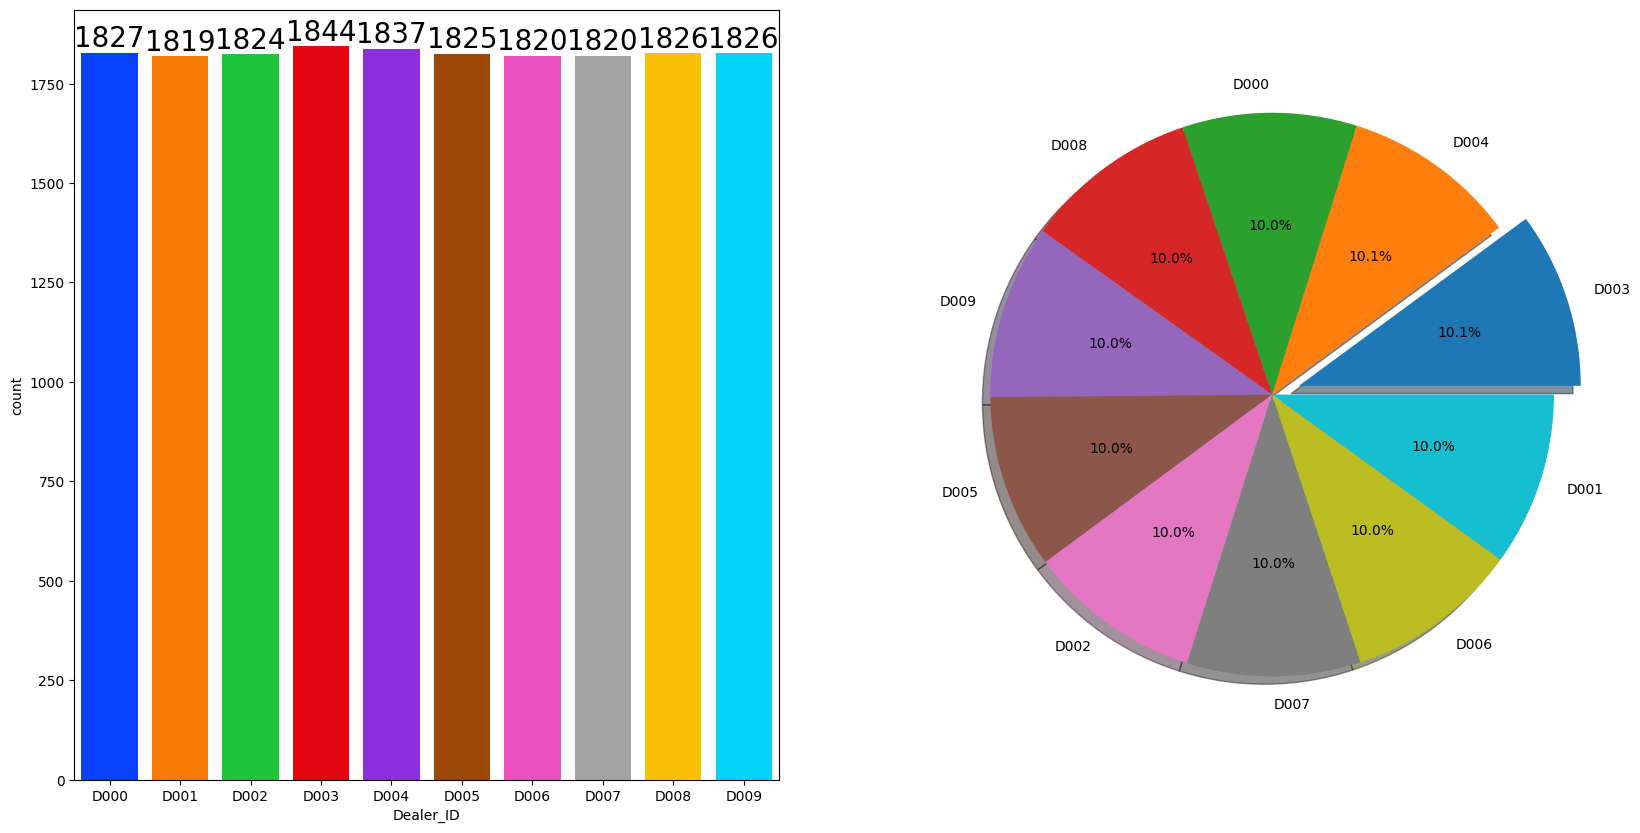

In [60]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Dealer_ID'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['Dealer_ID'].value_counts(),labels=df['Dealer_ID'].value_counts().index,explode=[0.1,0,0,0,0,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

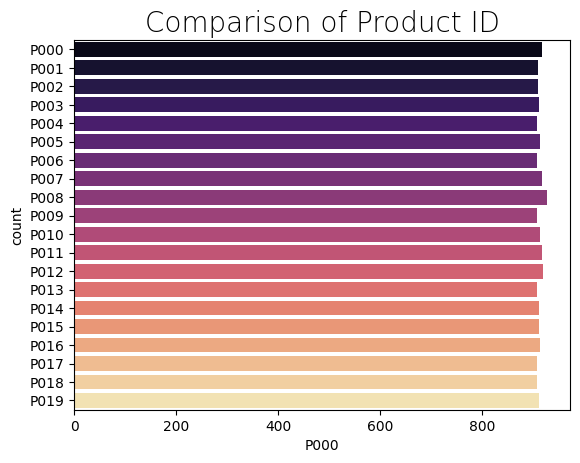

In [70]:
sns.countplot(df['Product_ID'], palette = 'magma')
plt.title('Comparison of Product ID', fontweight = 30, fontsize = 20)
plt.xlabel('P000')
plt.ylabel('count')
plt.show()

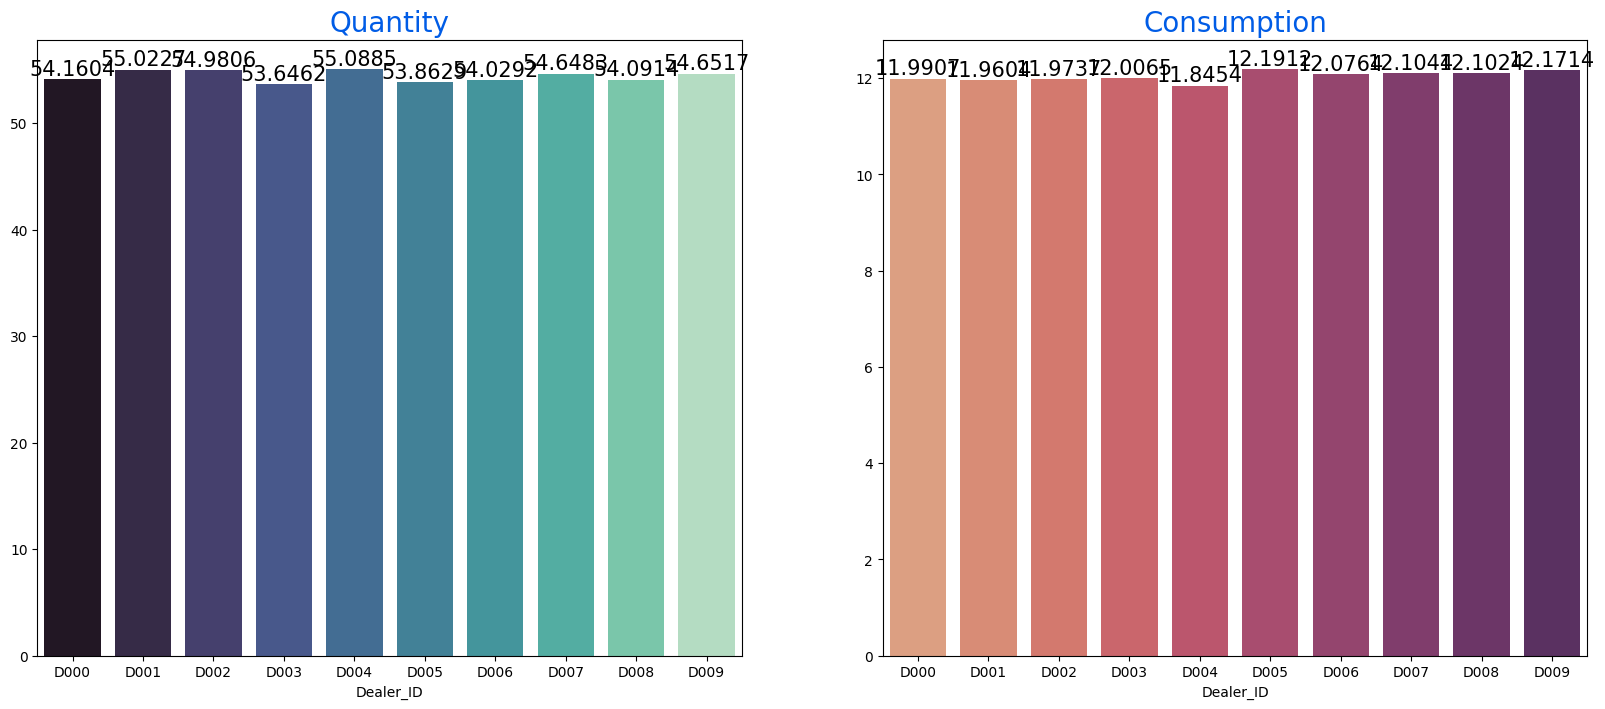

In [62]:
Group_data2=df.groupby('Dealer_ID')
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x=Group_data2['Quantity'].mean().index,y=Group_data2['Quantity'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Quantity',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['Consumption'].mean().index,y=Group_data2['Consumption'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Consumption',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)


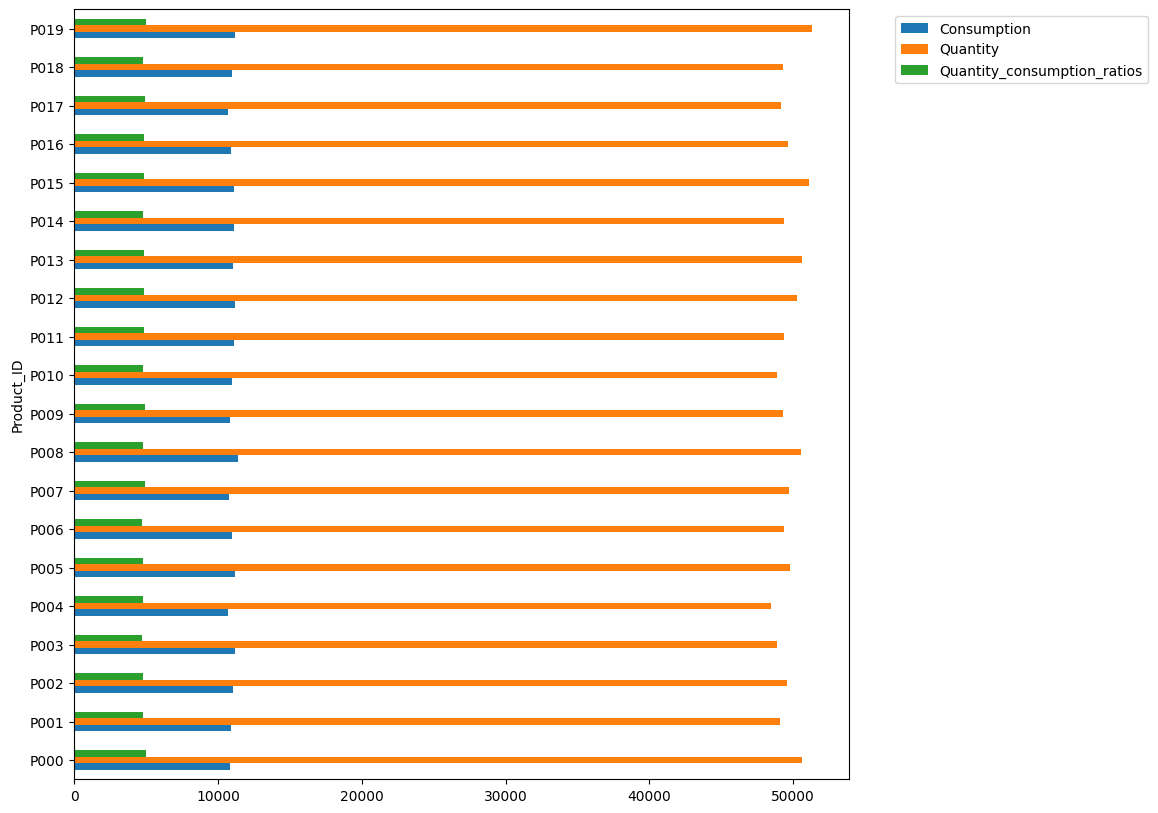

In [69]:
df.groupby('Product_ID')[['Consumption','Quantity','Quantity_consumption_ratios']].agg('sum').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
plt.show()

In [68]:
df

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,Consumption_Level,Quantity_consumption_ratios
0,D000,P000,NaT,62.0,8.0,Chicago,Low,7.750000
1,D000,P000,NaT,70.0,9.0,Chicago,Low,7.777778
2,D000,P000,NaT,12.0,17.0,Los Angeles,High,0.705882
3,D000,P000,NaT,74.0,13.0,Los Angeles,Medium,5.692308
4,D000,P000,NaT,57.0,10.0,Los Angeles,Low,5.700000
...,...,...,...,...,...,...,...,...
18355,D001,P012,NaT,71.0,15.0,Los Angeles,High,4.733333
18356,D003,P014,NaT,47.0,12.0,Los Angeles,Medium,3.916667
18357,D001,P013,NaT,89.0,8.0,Chicago,Low,11.125000
18358,D004,P017,NaT,29.0,6.0,New York,Low,4.833333
